In [2]:
import pandas as np
a = np.read_csv("/content/student.csv")
print(a)

     Student_ID  Age  ...         Region School_Support_for_VR_in_Curriculum
0      STUD0001   13  ...  South America                                  No
1      STUD0002   16  ...        Oceania                                  No
2      STUD0003   15  ...        Oceania                                  No
3      STUD0004   24  ...         Europe                                 Yes
4      STUD0005   22  ...  North America                                 Yes
...         ...  ...  ...            ...                                 ...
4995   STUD4996   18  ...           Asia                                  No
4996   STUD4997   25  ...  South America                                  No
4997   STUD4998   25  ...  North America                                  No
4998   STUD4999   22  ...         Africa                                  No
4999   STUD5000   21  ...           Asia                                 Yes

[5000 rows x 20 columns]


In [3]:
a.isnull().sum()

Student_ID                                  0
Age                                         0
Gender                                      0
Grade_Level                                 0
Field_of_Study                              0
Usage_of_VR_in_Education                    0
Hours_of_VR_Usage_Per_Week                  0
Engagement_Level                            0
Improvement_in_Learning_Outcomes            0
Subject                                     0
Instructor_VR_Proficiency                   0
Perceived_Effectiveness_of_VR               0
Access_to_VR_Equipment                      0
Impact_on_Creativity                        0
Stress_Level_with_VR_Usage                  0
Collaboration_with_Peers_via_VR             0
Feedback_from_Educators_on_VR               0
Interest_in_Continuing_VR_Based_Learning    0
Region                                      0
School_Support_for_VR_in_Curriculum         0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()


In [7]:
a["Student_ID"] = b.fit_transform(a["Student_ID"])
a["Gender"] = b.fit_transform(a["Gender"])
a["Grade_Level"] = b.fit_transform(a["Grade_Level"])
a["Field_of_Study"] = b.fit_transform(a["Field_of_Study"])
a["Usage_of_VR_in_Education"] = b.fit_transform(a["Usage_of_VR_in_Education"])
a["Improvement_in_Learning_Outcomes"] = b.fit_transform(a["Improvement_in_Learning_Outcomes"])
a["Subject"] = b.fit_transform(a["Subject"])
a["Instructor_VR_Proficiency"] = b.fit_transform(a["Instructor_VR_Proficiency"])
a["Access_to_VR_Equipment"] = b.fit_transform(a["Access_to_VR_Equipment"])
a["Stress_Level_with_VR_Usage"] = b.fit_transform(a["Stress_Level_with_VR_Usage"])
a["Collaboration_with_Peers_via_VR"] = b.fit_transform(a["Collaboration_with_Peers_via_VR"])
a["Feedback_from_Educators_on_VR"] = b.fit_transform(a["Feedback_from_Educators_on_VR"])
a["Interest_in_Continuing_VR_Based_Learning"] = b.fit_transform(a["Interest_in_Continuing_VR_Based_Learning"])
a["Region"] = b.fit_transform(a["Region"])
a["School_Support_for_VR_in_Curriculum"] = b.fit_transform(a["School_Support_for_VR_in_Curriculum"])

In [8]:
print(a)

      Student_ID  Age  ...  Region  School_Support_for_VR_in_Curriculum
0              0   13  ...       5                                    0
1              1   16  ...       4                                    0
2              2   15  ...       4                                    0
3              3   24  ...       2                                    1
4              4   22  ...       3                                    1
...          ...  ...  ...     ...                                  ...
4995        4995   18  ...       1                                    0
4996        4996   25  ...       5                                    0
4997        4997   25  ...       3                                    0
4998        4998   22  ...       0                                    0
4999        4999   21  ...       1                                    1

[5000 rows x 20 columns]


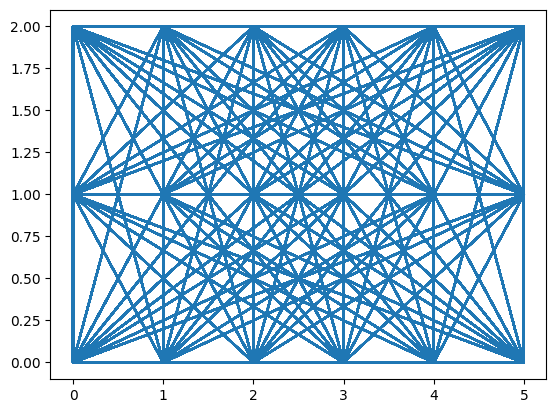

In [ ]:
from matplotlib import pyplot as plt
plt.plot(a["Region"],a["Grade_Level"])

In [39]:
x=a.drop("Improvement_in_Learning_Outcomes",axis=1)
y=a["Improvement_in_Learning_Outcomes"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print(xtrain)
print(ytrain)

      Student_ID  Age  ...  Region  School_Support_for_VR_in_Curriculum
39            39   29  ...       1                                    0
2233        2233   22  ...       4                                    1
1467        1467   22  ...       2                                    0
2803        2803   27  ...       0                                    0
1130        1130   30  ...       2                                    0
...          ...  ...  ...     ...                                  ...
2630        2630   26  ...       2                                    1
3518        3518   24  ...       1                                    0
4306        4306   23  ...       4                                    1
517          517   28  ...       5                                    0
700          700   19  ...       0                                    1

[4000 rows x 19 columns]
39      0
2233    0
1467    0
2803    1
1130    0
       ..
2630    1
3518    0
4306    1
517     1
700     1


In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
data=lr.predict([[5000,20,1,2,1,1,4,5,0,3,1,5,1,5,0,0,1,1,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
print(data)

[1]


In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

[[249 254]
 [215 282]]
0.531
              precision    recall  f1-score   support

           0       0.54      0.50      0.51       503
           1       0.53      0.57      0.55       497

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000

